# Piston connected to a flywheel


## Analysis of the cylinder

The volume of gas in the cylinder is
\begin{align*}
V &= (x-l+L) A
\end{align*}
The position of the piston is given by
\begin{align*}
x &= R\cos\theta+l(1-(R/l)^2\sin^2\theta)^{1/2}
\end{align*}
which varies from $R+l$ to $-R+l$.

For an ideal gas,
\begin{align*}
p &= \frac{NRT}{V}
\\
&= \frac{NRT}{(x-l+L)A}
\end{align*}
We assume that when the piston is centered in the cylinder (i.e.\
$x=l$ when $\theta=\pm\pi/2$) and the temperature of the gas is $T_0$,
then the pressure of the gas in the cylinder is $p_0$.  This implies:
\begin{align*}
p_0 &= \frac{NRT_0}{LA}
\end{align*}
Therefore, we find
\begin{align*}
\frac{p}{p_0} 
&= \frac{NRT}{(x-l+L)A} 
\frac{LA}{NRT_0}
\\
&= \frac{T/T_0}{(x-l)/L+1} 
\end{align*}

## Rate of work

The rate of work performed by the force of the gas in the cylinder is
\begin{align*}
\dot{W} &= F_x v_x
\\
&= F_x \Bigg[
- R\omega \sin\theta - \frac{R\omega\cos\theta}{\cos\phi}\sin\phi
\Bigg]
\\
&= F_x \Bigg[
- R\omega \sin\theta 
- R\omega\cos\theta \frac{(R/l)\sin\theta}{(1-(R/l)^2\sin^2\theta)^{1/2}}
\Bigg]
\\
&= - F_x R\omega \sin\theta \Bigg[
1 + \frac{(R/l)\cos\theta}{(1-(R/l)^2\sin^2\theta)^{1/2}}
\Bigg]
\\
&= - p A R\omega \sin\theta \Bigg[
1 + \frac{(R/l)\cos\theta}{(1-(R/l)^2\sin^2\theta)^{1/2}}
\Bigg]
\end{align*}

## Cylinder energy balance

Performing an energy balance over the piston gives
\begin{align*}
\frac{\partial}{\partial t} (NU) 
&= \dot{Q} - \dot{W}
\\
NC_V\frac{\partial T}{\partial t}
&= \dot{Q} - \dot{W}
\\
\frac{\partial (T/T_0)}{\partial t}
&= \frac{\dot{Q}}{NC_VT_0} - \frac{\dot{W}}{NC_VT_0}
\end{align*}

## Flywheel energy balance

\begin{align*}
\frac{d}{dt} \frac{1}{2}I\omega^2
&= \dot{W}
%- \tau_f \omega
\\
I \frac{d\omega}{dt} 
&= \frac{\dot{W}}{\omega}
%- \tau_f
\end{align*}

\begin{align*}
\frac{d\theta}{dt} &= \omega
\end{align*}


In [1]:
R = 1.0  # crank radius
l = 5.0  # linker length
I = 1.0  # moment of inertia of the flywheel
L = 5.0  # cylinder neutral length

TH = 1.1
TC = 1.0



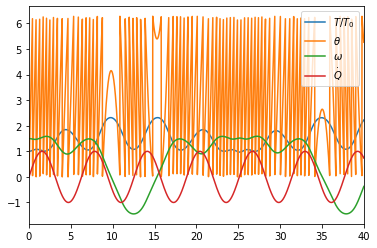

In [2]:
import numpy as np
from numpy import pi
from numpy import arange, cos, sin, sqrt
from scipy.integrate import odeint
import math

def deriv(y, t):

    T, theta, omega = y

    R_l = R/l
    x = R*cos(theta) + l*sqrt(1.0-(R_l*sin(theta))**2)

    p = T / ((x-l)/L+1.0)
    dotQ = 0.1*sin(t)
#    h_AH = 1.0+sin(t)
#    h_AC = 1.0+sin(t-0.5*pi) 
#    dotQ = h_AH*(TH-T) - h_AC*(T-TC)
    dotW = (p-1.0) * omega * sin(theta)
    dotW *= 1.0+R_l*cos(theta)/sqrt(1.0-(R_l*sin(theta))**2)
    
    domegadt = dotW / I / omega

    res = []
    res.append(dotQ - dotW)
    res.append(omega)
    res.append(domegadt)

    return res



t_data = arange(0.0, 100.0, 0.01)
y0 = [1.0, 0.0, 1.5]
sol = odeint(deriv, y0, t_data)
#print(sol)

dotQ_data = [sin(t) for t in t_data]

import pylab as plt
plt.plot(t_data, sol[:,0], label=r'$T/T_0$')
theta = [2*math.pi*math.modf(t/2*math.pi)[0] for t in list(sol[:,1])]
plt.plot(t_data, theta, label=r'$\theta$')
plt.plot(t_data, sol[:,2], label=r'$\omega$')
plt.plot(t_data, dotQ_data, label=r'$\dot{Q}$')

plt.xlim(0, 40)
#plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

## Animation

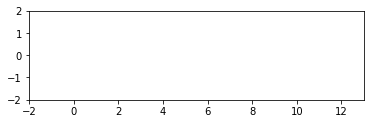

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML

frames = len(t_data)
frames = 1000

fig, ax = plt.subplots()

ax.set_xlim([-2.0, 13.0])
ax.set_ylim([-2.0, 2.0])
ax.set_aspect(aspect=1)

cylinder, = ax.plot([], [], lw=3, color='black')

joint, = ax.plot([], [], 'ro')
crank, = ax.plot([], [], lw='3', color='black')
rod, = ax.plot([], [], lw='3', color='black')


objs = [joint, crank, rod]


In [4]:
def get_x(theta):
    
    ratio = R/l
    f = R*np.cos(theta) + l*np.sqrt(1.0-(ratio*np.sin(theta))**2)
    
    return f

In [5]:
def init():
    for obj in objs:
        obj.set_data([], [])
    cylinder.set_data([R+l, 2.0*R+l+L, 2.0*R+l+L, R+l], [0.5, 0.5, -0.5, -0.5])
    return objs

In [6]:
def animate(i):

    t = t_data[i]
    theta = sol[:,1][i]
    
    joint.set_data([R*np.cos(theta)], [R*np.sin(theta)])
    crank.set_data([0.0, R*np.cos(theta)], [0.0, R*np.sin(theta)])
    
    x = get_x(theta)
    lead = 2.0
    piston = x + lead
    rod.set_data([R*np.cos(theta), x, piston, piston, piston], [R*np.sin(theta), 0.0, 0.0, 0.5, -0.5])
    
    return objs

In [7]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=20, blit=True)

In [8]:
HTML(anim.to_html5_video())